In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
import seaborn as sns
from sklearn.compose import ColumnTransformer

In [49]:
## Data Loading
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# Basic Data Exploration
print('Shape of the dataset:',data.shape)
print('\n Summarized info of the dataset:')
print(data.info())
print('\n Missing values in the dataset:',data.isna().sum().sum())


Shape of the dataset: (10000, 14)

 Summarized info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

 Missing values in t

In [51]:
# Target Variable Distribution
print('Unique values in Target variable:')
print(data.Exited.value_counts())
print('\n Percentage distribution of Target variable:')
print(data.Exited.value_counts(normalize=True)*100)


Unique values in Target variable:
Exited
0    7963
1    2037
Name: count, dtype: int64

 Percentage distribution of Target variable:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


## Data Visualization

<Axes: xlabel='Exited'>

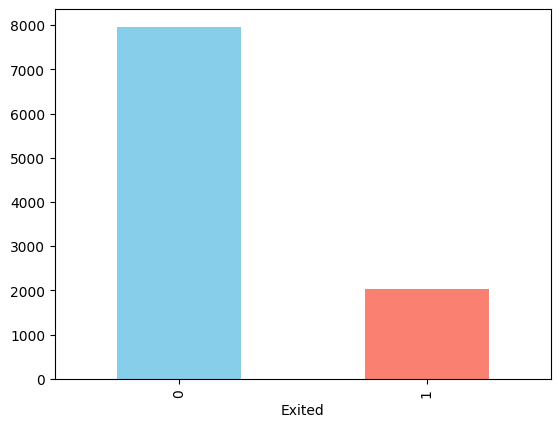

In [52]:
# Target Variable Plot
data.Exited.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

<Axes: xlabel='Gender'>

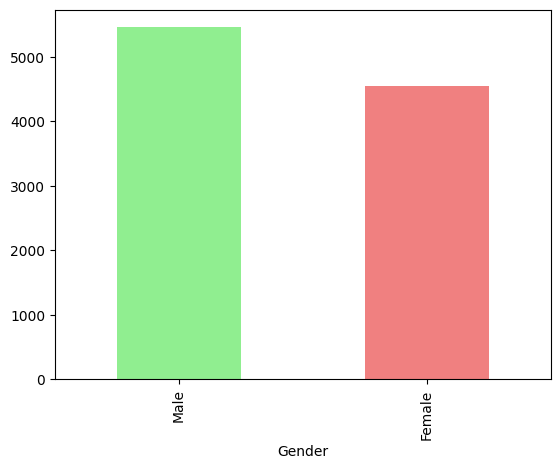

In [53]:
data.Gender.value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral'])

<Axes: xlabel='Geography'>

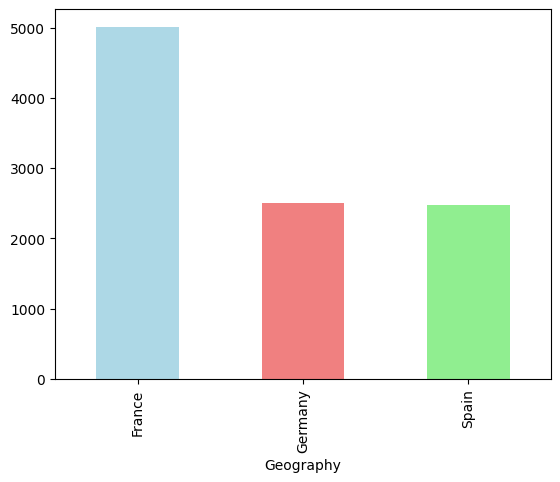

In [54]:
data.Geography.value_counts().plot(kind='bar',color=['lightblue','lightcoral','lightgreen'])

<Axes: xlabel='NumOfProducts'>

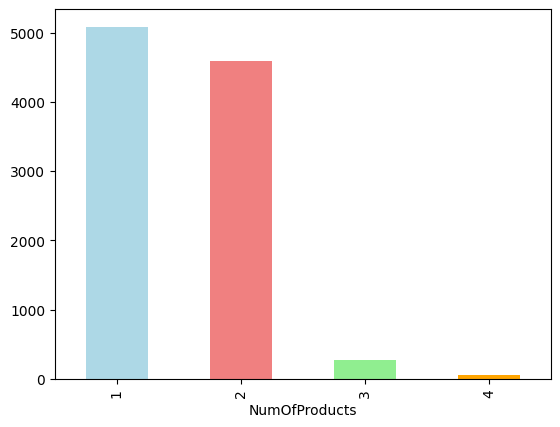

In [55]:
# Number of Products
data.NumOfProducts.value_counts().plot(kind='bar', color=['lightblue','lightcoral','lightgreen','orange'])

Text(0.5, 0, 'Has Credit Card')

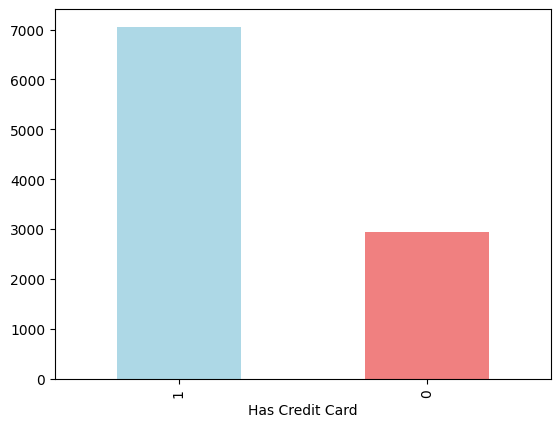

In [56]:
# Credit Card Holders
data.HasCrCard.value_counts().plot(kind='bar', color=['lightblue','lightcoral'])
plt.xlabel('Has Credit Card')


Text(0.5, 0, 'Is Active Member')

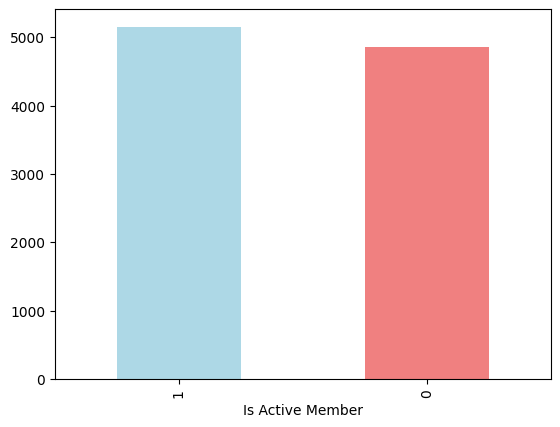

In [57]:
# Active Members
data.IsActiveMember.value_counts().plot(kind='bar', color=['lightblue','lightcoral'])
plt.xlabel('Is Active Member')

<Axes: xlabel='Tenure'>

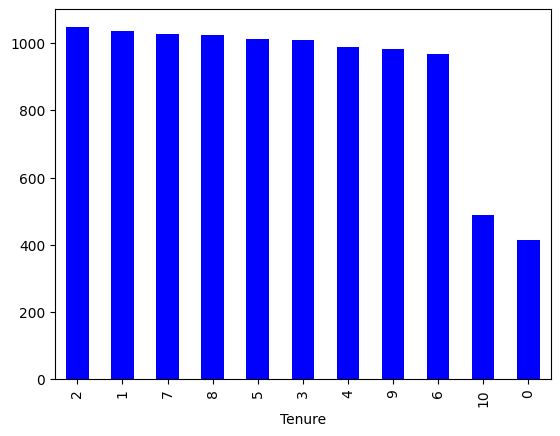

In [58]:
data.Tenure.value_counts().plot(kind='bar', color='blue')

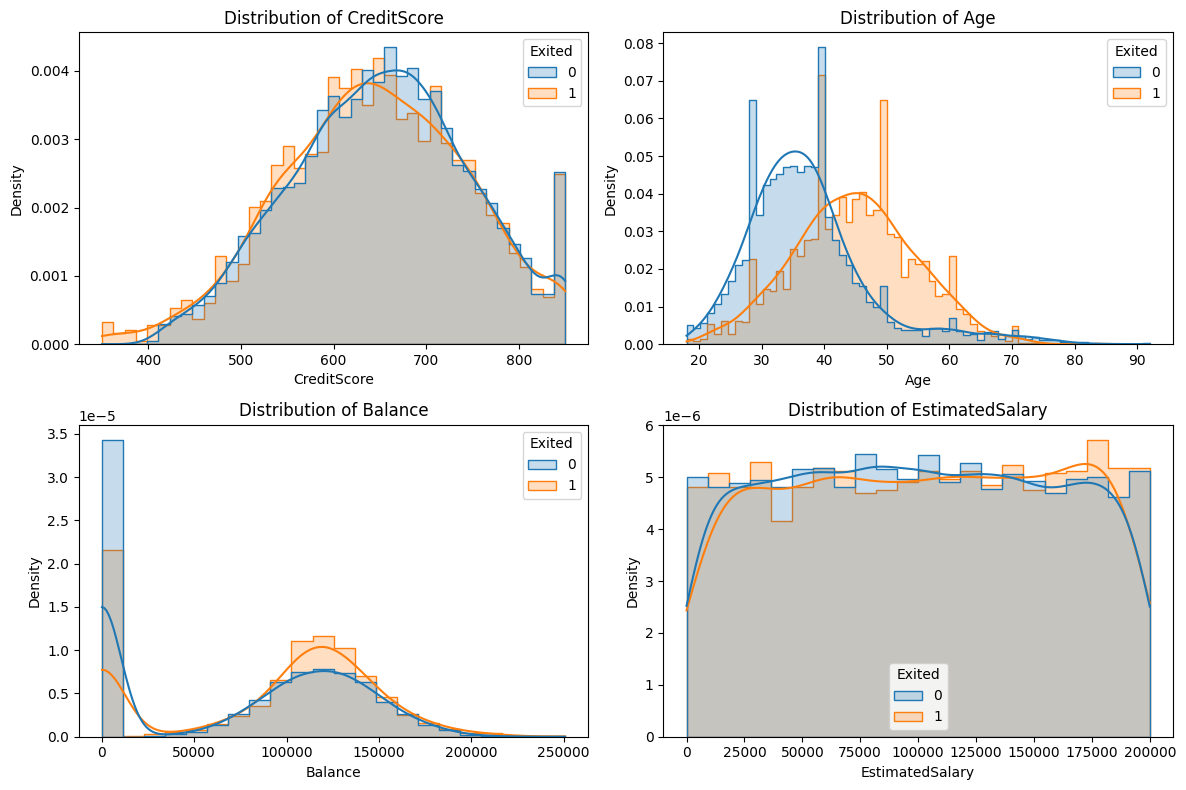

In [59]:
conti_cols = ['CreditScore','Age','Balance','EstimatedSalary']
plt.figure(figsize=(12,8))
fig_no=1
for col in conti_cols:
    plt.subplot(2,2,fig_no)
    sns.histplot(x=col, data=data, kde = True, hue='Exited', element='step', stat='density', common_norm=False, color='blue')
    plt.title(f'Distribution of {col}')
    fig_no+=1
plt.tight_layout()


<Axes: xlabel='Age', ylabel='CreditScore'>

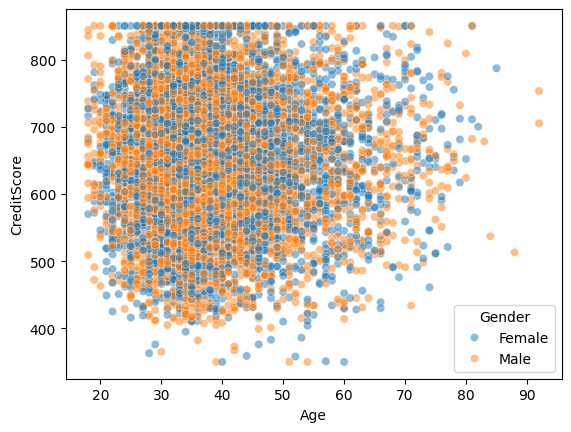

In [60]:
# Bivariate Analysis
import seaborn as sns
sns.scatterplot(x='Age',y='CreditScore', hue='Gender', data=data, alpha=0.5)


<Axes: xlabel='Age', ylabel='CreditScore'>

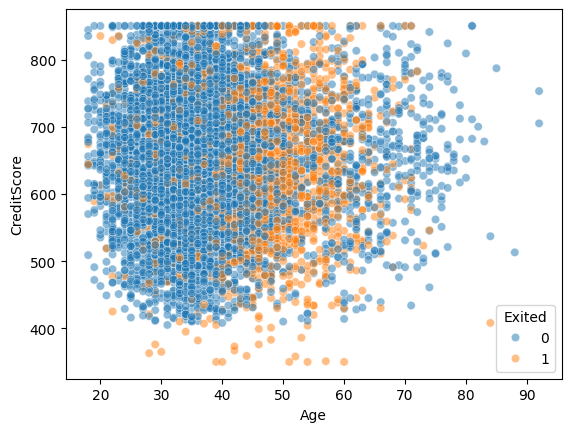

In [61]:
sns.scatterplot(x='Age',y='CreditScore', hue='Exited', data=data, alpha=0.5)

<Axes: xlabel='Age', ylabel='Balance'>

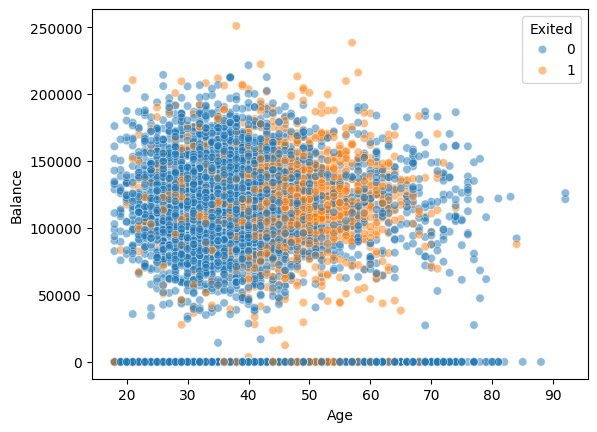

In [62]:
sns.scatterplot(x='Age',y='Balance', hue='Exited', data=data, alpha=0.5)

<Axes: xlabel='Age', ylabel='Density'>

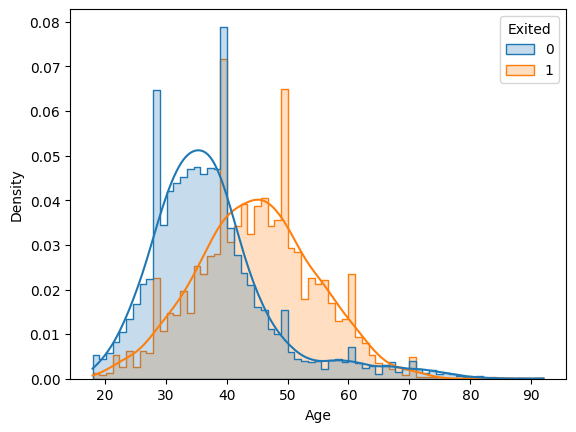

In [63]:
sns.histplot(x='Age', hue='Exited', data=data, kde=True, element='step', stat='density', common_norm=False)

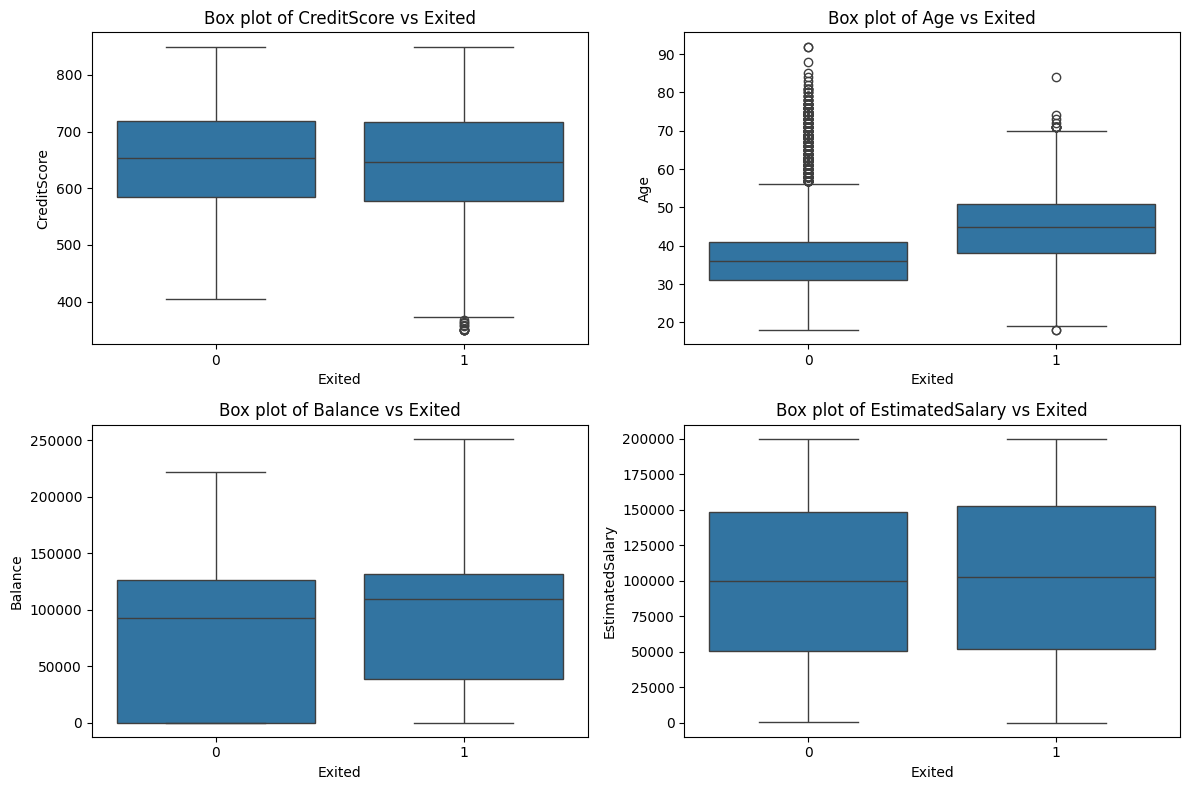

In [64]:
# Box Plot
plt.figure(figsize=(12,8))
fig_no=1
for col in conti_cols:
    plt.subplot(2,2,fig_no)
    sns.boxplot(x='Exited', y=col, data=data)
    plt.title(f'Box plot of {col} vs Exited')
    fig_no+=1
plt.tight_layout()

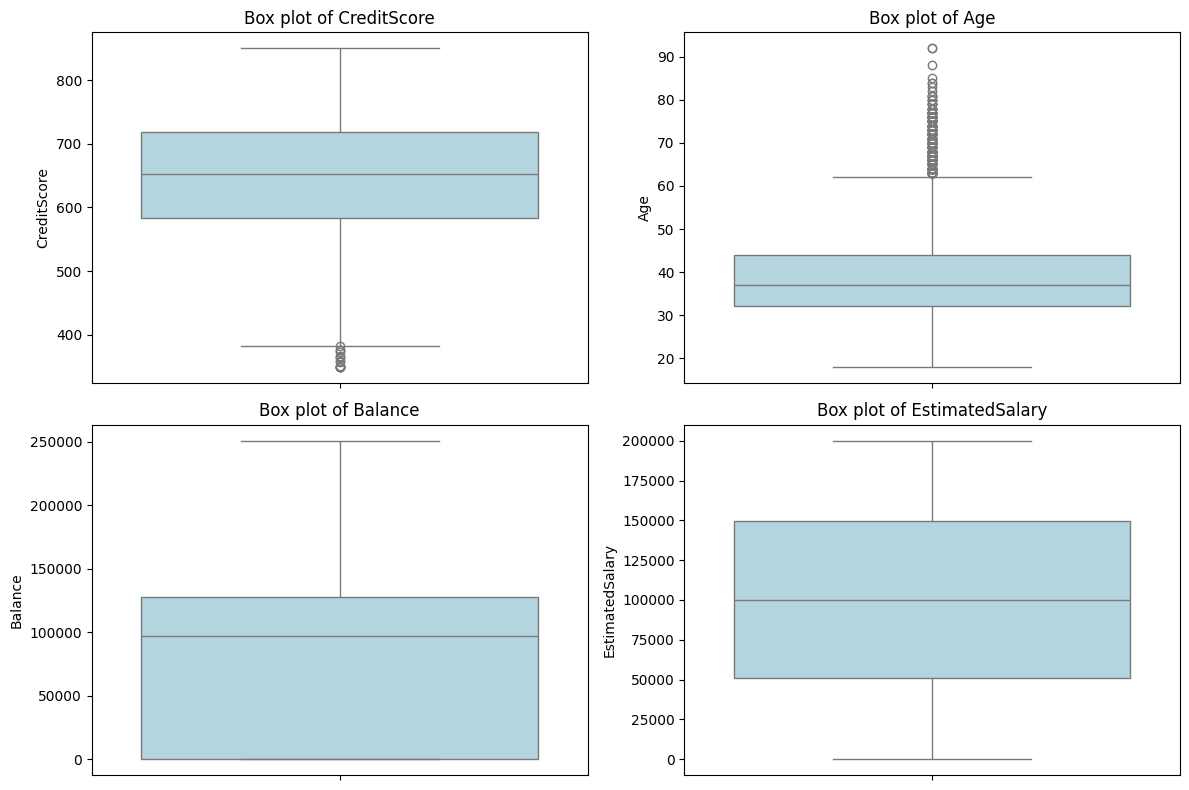

In [65]:
plt.figure(figsize=(12,8))
fig_no=1
for col in conti_cols:
    plt.subplot(2,2,fig_no)
    sns.boxplot(y=col, data=data,color='lightblue')
    plt.title(f'Box plot of {col}')
    fig_no+=1
plt.tight_layout()

In [106]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Data Preprocessing

In [66]:
# Drop irrelevant columns
data = data.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Train Test Split

In [69]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [102]:
X.shape

(10000, 10)

In [103]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
X_train[0]

array([ 1.        ,  0.        ,  0.        , -0.6557859 , -1.21847056,
        0.35649971,  1.36766974,  0.64920267,  0.97481699,  0.80843615,
        0.34567966])

In [71]:
# Column Transformer for Scaling and encoding

transformer = ColumnTransformer(transformers=[
    ('le_gender', OrdinalEncoder(), ['Gender']),
    ('ohe', OneHotEncoder(drop='first'), ['Geography']),
    ('scaler', StandardScaler(), X.columns.difference(['Gender','Geography']).tolist())
], remainder='passthrough')

In [72]:
# Transforming the features
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [74]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [75]:
# Saving transformer model pkl file
with open('feature_transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

## ANN Model Implementation

In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [86]:
import datetime

# Building the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input Layer
model.add(Dropout(0.1))  # Dropout layer for regularization

model.add(Dense(32, activation='relu'))  # Hidden Layer 
model.add(Dropout(0.1))  # Dropout layer for regularization

model.add(Dense(10, activation='relu'))  # Hidden Layer
model.add(Dropout(0.1))  # Dropout layer for regularization 

model.add(Dense(1, activation='sigmoid'))  # Output Layer

In [77]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,189 (12.46 KB)

 Trainable params: 3,189 (12.46 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
# Setting up Tensorboard callbacks
log_dir = "logd/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)   

In [89]:
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [90]:
# Training the model

model.fit(X_train,y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, tensorboard_callback])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8306 - loss: 0.4084 - val_accuracy: 0.8512 - val_loss: 0.3757
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.3810 - val_accuracy: 0.8450 - val_loss: 0.3632
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.3768 - val_accuracy: 0.8550 - val_loss: 0.3580
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 0.3715 - val_accuracy: 0.8556 - val_loss: 0.3513
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8455 - loss: 0.3639 - val_accuracy: 0.8587 - val_loss: 0.3471
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8505 - loss: 0.3624 - val_accuracy: 0.8525 - val_loss: 0.3476
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8533 - loss: 0.3564 - val_accuracy: 0.8575 - val_loss: 0.3443
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8539 - loss: 0.3500 - val_accu

In [93]:
# Load Tensorboard for visualization
%load_ext tensorboard
%tensorboard --logdir logd/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 35096), started 0:03:39 ago. (Use '!kill 35096' to kill it.)

In [94]:
# Save the model
model.save('churn_model_ann.h5')

In [95]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'\nTest Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8575 - loss: 0.3373
Test Loss: 0.33725854754447937

Test Accuracy: 0.8575000166893005


In [96]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [98]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8575
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.45      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
 [[1539   68]
 [ 217  176]]


<Axes: >

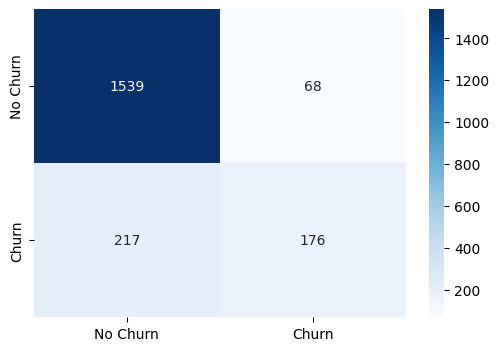

In [99]:
# plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])